import modules

In [1]:
from typing import Tuple, List, Callable
from enum import Enum
import torch as t
from torch.distributions import uniform
import random
from IPython.display import Image
from IPython import display
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from diffusion import diffuse
from diffusion_gumbel import diffuse_STE

c:\Users\jsche\anaconda3\envs\torchenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


define grid

In [3]:
grid = t.zeros((1,2,50,50))
grid[:,:,15:30] = 200
print(t.sum(grid))

tensor(300000.)


standard model

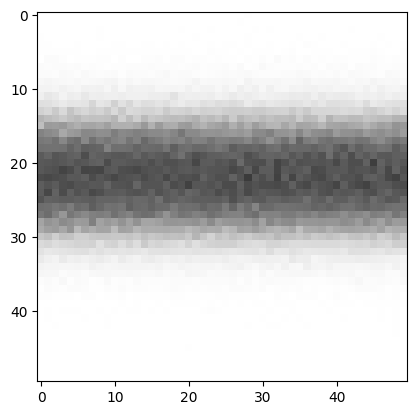

tensor(300000.)

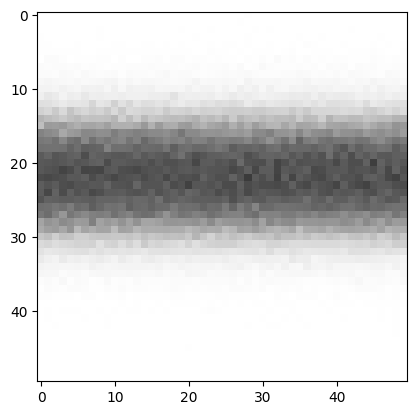

In [6]:
N = 256 
for i in range(10_000):
  if i % 100 == 0:
    display.clear_output(wait=True)
    plt.cla()
    plt.imshow(grid[0,0], cmap="Greys", interpolation="nearest", vmin=0, vmax=256)
    display.display(plt.gcf())
  grid[0] = diffuse(grid[0], N, 0.5, 0.5)
t.sum(grid)

differentiable model

In [4]:
grid = t.zeros((1,2,50,50))
grid[:,:,15:30] = 200
print(t.sum(grid))

tensor(300000.)


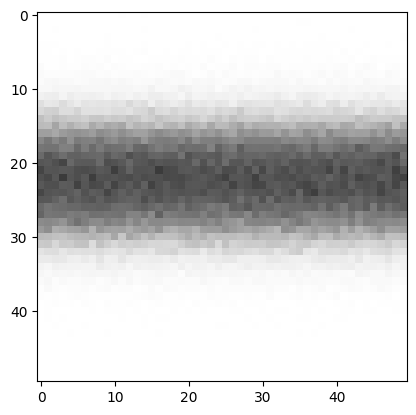

tensor(300000.)

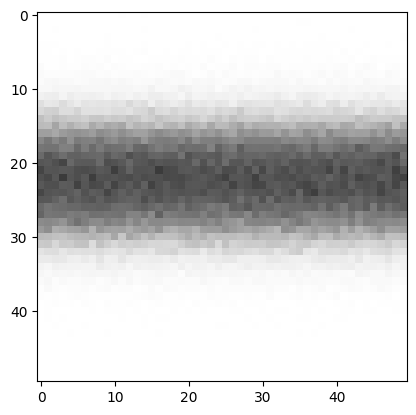

In [5]:
N = 256 
D_A = t.tensor(0.5)
D_B = t.tensor(0.5)
for i in range(10_000):
  if i % 100 == 0:
    display.clear_output(wait=True)
    plt.cla()
    plt.imshow(grid[0,0], cmap="Greys", interpolation="nearest", vmin=0, vmax=256)
    display.display(plt.gcf())
  grid = diffuse_STE(grid, N, D_A, D_B)
t.sum(grid)